## Import Modules

In [1]:
import numpy as np
import pandas as pd
from konlpy.tag import Twitter
from hanja import hangul

from collections import Counter
import os
import pickle

In [2]:
files = os.listdir('Univ_data')

## Univ list , Make DataFrame

In [3]:
univ_list = [x[0:x.find('_')] for x in files]
univ_dic = {}

In [4]:
for idx, file in enumerate(files):
    file_name = 'Univ_data/' + file
    with open(file_name,'rb') as f:
        univ_dic[univ_list[idx]]= pickle.load(f)

In [5]:
for univ in univ_list:
    for attr in univ_dic[univ].keys():
        if((attr !='num_likes') & (attr != 'status_message') & (attr != 'status_published')):
            univ_dic[univ].drop(attr,axis = 1, inplace=True)

In [6]:
for i in range(len(univ_dic.keys())):
    univ_dic[list(univ_dic.keys())[i]]['School'] = list(univ_dic.keys())[i]

In [7]:
univ_dic.keys()

dict_keys(['KU', 'Medical', 'Nursing', 'SKKU', 'SMWU', 'SNU', 'SWU', 'YONSEI'])

### Make DataFrame

In [8]:
data = pd.DataFrame()
for univ in univ_dic.keys():
    data = data.append(univ_dic[univ])

In [9]:
def return_hangul(string):
    temp =""
    for x in string:
        if((hangul.is_hangul(x)) | (x==" ") ):
            temp = temp + x
    return temp

In [10]:
data['Hangul'] = data.status_message.apply(return_hangul)

In [26]:
data[data.School=='Medical'].status_published.tail()

1295    2016-09-20 04:34:32
1296    2016-09-19 01:58:45
1297    2016-09-18 10:40:50
1298    2016-09-10 13:39:51
1299    2016-09-09 14:43:56
Name: status_published, dtype: object

# Let's explore data

### The # of Articles

In [12]:
pd.DataFrame([len(univ_dic[x]) for x in univ_list],index=univ_list,columns=['Post_Number'])

,Post_Number
KU,2800
Medical,1300
Nursing,1300
SKKU,2800
SMWU,2400
SNU,2800
SWU,2000
YONSEI,2700


### Most "Liked" Post

In [13]:
for i in range(10):    
    print(univ_dic['SWU'].sort_values('num_likes',ascending = False).status_message.iloc[i])
    print('='*100)

#10924번째사연
#서울여대_대나무숲_진구오빠와_포옹이라니_부럽
저 오늘 여진구랑 손바닥치기 게임도 하고 손깍지도 끼고 포옹도 해써여!!!ㅠㅠㅠ 겁나행복ㅠㅠ 무엇보다 "잊어달라 하였느냐 잊어주길 바라느냐 미안하구나 잊으려하였으나 너를 잊지 못하였다"를 제 폰에 녹화해준게 젤행복...S2 징구오빠...

#18366번째사연
#서울여대_대나무숲_뷰티
2017. 4. 11 오전 2:09:03
안녕하세요 이제서야 이런곳이 있다는 것을 알고 늦게 제보합니다. 저는 타 대학을 다니고있는, 할머니와 함께 살고있는 한 남학생입니다. 바로 본론으로 들어가겠습니다. 얼마 전 저희 할머니께서 공릉역에서 무거운 짐을 들고 카트를 끌고 가시다가 저혈당 증세가 나타나셔서 (당뇨가 심하십니다) 식은땀을 줄줄 흘리시면서 비틀거리시다가 지하철 내려가는 곳 계단에 주저앉으셨는데, 머리가 길고 얼굴이 뽀얀 학생이 얼른 달려오셔서 잡아주시고 당뇨 있으시냐고 물어본 뒤, 사탕이랑 단 음료수(초코우유로 추정)를 할머니께 다급하게 먹여드리고 상태를 확인한 뒤에 짐을 들어 지하철 타는 곳까지 모셔다 드렸다고 합니다. 저희 할머니께서 학생분 학교와 이름을 물어보셨는데 서울여자대학교 학생이라고 본인 할머니가 생각나서 놀랐다면서 앞으로 어지러우시거나 식은땀이 나면 사탕을 갖고다니시다가 빨리 드시라고 가방에 갖고있던 사탕을("애니타임"이었습니다) 봉지째 할머니 가방에 넣어주셨다고 합니다. 정말 너무 감사해서 이렇게라도 글을 남깁니다. 정말 천사십니다. 할머니께 학생분 특징을 계속 여쭤보았는데 목에 그림이 있다고 하신걸로 미루어 보아 타투나 해나(?)등을 하신 분이 아닌가 싶습니다..(할머니께서 계속 목에 굽실굽실한 그림이 있다고 하셨습니다.사실 저도 잘 모르겠습니다 무슨 의미인지..) 또 머리가 길고 얼굴이 뽀얗고 흰 신발에 모자옷(후드티)을 입고 있었다고 합니다..성은 정씨에 나라정을 쓴다고 했다고 합니다. 또 이름이 특이했다고 하시는데 그게 이상하게 잘 기억이 안나신다고 합니다. 비슷한 인상착의나 혹시 

## Count words for each University

In [17]:
SNU_counts = Counter()
YONSEI_counts = Counter()
KOREA_counts = Counter()
SMWU_counts = Counter()
SWU_counts = Counter()
MEDICAL_counts = Counter()
NURSING_counts = Counter()
TOTAL_counts = Counter()

In [18]:
count_univ = [SNU_counts, YONSEI_counts, KOREA_counts, SMWU_counts , SWU_counts, MEDICAL_counts, NURSING_counts,TOTAL_counts ]

In [19]:
Korean_analyzer = Twitter()

## Set stopwords

In [20]:
SMWU_stop = ['눈꽃 ','오전','오후','눈송이']
SKKU_stop = ['울림', '오전','오후']
SNU_stop = []
SWU_stop = ['서울', '나무숲','대대','오전','오후','사연']
YONSEI_stop =['외침','오전','오후','연대']
KOREA_stop = ['포효']
MEDICAL_stop=[]
NURSING_stop=[]

In [21]:
for i in range(len(data)):
    if(data.School.iloc[i] == 'SMWU'):
        for word in [word for word in Korean_analyzer.nouns(data.Hangul.iloc[i]) if word not in SMWU_stop] :
            if len(word) > 1 :
                SMWU_counts[word] += 1
                TOTAL_counts[word] += 1
            
    elif(data.School.iloc[i] =='SNU' ):
        for word in [word for word in Korean_analyzer.nouns(data.Hangul.iloc[i]) if word not in SNU_stop] :
            if len(word) > 1 :
                SNU_counts[word] += 1
                TOTAL_counts[word] += 1
            
    elif(data.School.iloc[i] =='SWU' ):
        for word in [word for word in Korean_analyzer.nouns(data.Hangul.iloc[i]) if word not in SWU_stop] :
            if len(word) > 1 :
                SWU_counts[word] += 1
                TOTAL_counts[word] += 1
            
    elif(data.School.iloc[i] =='YONSEI' ):
        for word in [word for word in Korean_analyzer.nouns(data.Hangul.iloc[i]) if word not in YONSEI_stop] :
            if len(word) > 1 :
                YONSEI_counts[word] += 1
                TOTAL_counts[word] += 1
    
    elif(data.School.iloc[i] == 'KU'):
        for word in [word for word in Korean_analyzer.nouns(data.Hangul.iloc[i]) if word not in KOREA_stop] :
            if len(word) > 1 :
                KOREA_counts[word] += 1         
                TOTAL_counts[word] += 1
            
    elif(data.School.iloc[i] =='Medical' ):
        for word in [word for word in Korean_analyzer.nouns(data.Hangul.iloc[i]) if word not in MEDICAL_stop] :
            if len(word) > 1 :
                MEDICAL_counts[word] += 1
                TOTAL_counts[word] += 1
    
    elif(data.School.iloc[i] =='Nursing' ):
        for word in [word for word in Korean_analyzer.nouns(data.Hangul.iloc[i]) if word not in NURSING_stop] :
            if len(word) > 1 :
                NURSING_counts[word] += 1
                TOTAL_counts[word] += 1

In [23]:
with open('Counters_each_uinv.pickle','wb') as f:
    pickle.dump(count_univ,f)

## Make Word Cloud

In [1]:
import pickle
with open('Counters_each_uinv.pickle','rb') as f:
    [SNU_counts, YONSEI_counts, KOREA_counts, SMWU_counts , SWU_counts, MEDICAL_counts, NURSING_counts,TOTAL_counts ] = pickle.load(f)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from googletrans import Translator
%matplotlib inline

from wordcloud import WordCloud

In [5]:
translator = Translator()

SNU = pd.DataFrame(KOREA_counts.most_common(300))
SNU.set_index(0,inplace=True)
SNU.index = map(lambda x : translator.translate(x).text, SNU.index)
SNU_dict= SNU.to_dict()

del SNU

In [6]:
SNU_mask = np.array(Image.open('Univ_Logo/seouluniv_logo.png'))

In [7]:
wc = WordCloud(width=1280 , height=720, background_color="white").generate_from_frequencies(SNU_dict[1])

In [8]:
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(SNU_mask)

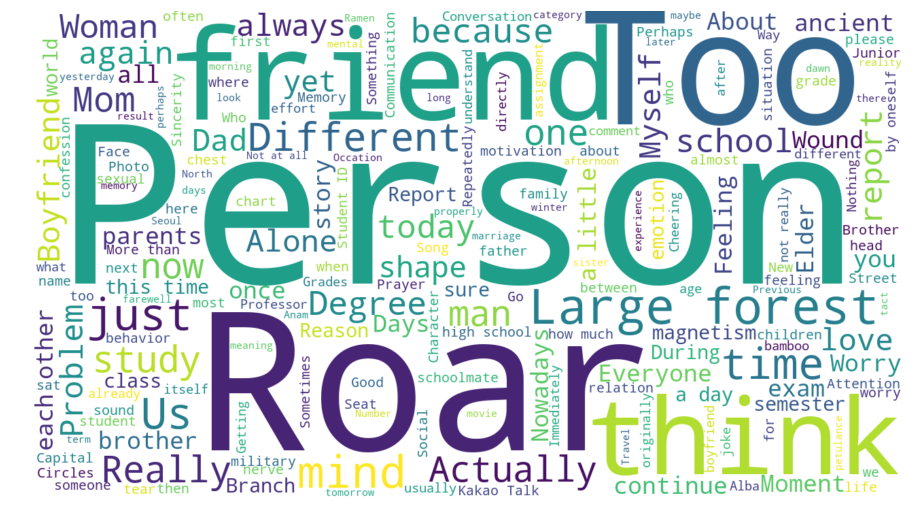

In [9]:
plt.figure(figsize=(16,9))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

## Using Pytagcloud

In [18]:
import pytagcloud

In [32]:
tags = MEDICAL_counts.most_common(100)
taglist =pytagcloud.make_tags(tags,maxsize=200)
pytagcloud.create_tag_image(taglist,'Word_Cloud_MEDICAL.jpg',size=(1280,720),fontname='NanumGothic_Bold',rectangular=False)

# Check Point

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle 
import pytagcloud
from googletrans import Translator
%matplotlib inline

## # count_univ = [SNU_counts, YONSEI_counts, KOREA_counts, SMWU_counts , SWU_counts, MEDICAL_counts, NURSING_counts,TOTAL_counts ]
with open('Counters_each_uinv.pickle','rb') as f:
    counters_univ = pickle.load(f)

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
test = pd.DataFrame([x for x in counters_univ]).T
test.columns = ['SNU', 'YONSEI', 'KOREA', 'SMWU','SWU', 'MEDICAL','NURSING','TOTAL']
test.dropna(inplace=True)
test.head()

,SNU,YONSEI,KOREA,SMWU,SWU,MEDICAL,NURSING,TOTAL
가게,42.0,30.0,34.0,29.0,17.0,7.0,16.0,118.0
가격,12.0,17.0,13.0,9.0,27.0,9.0,65.0,65.0
가계,2.0,8.0,2.0,1.0,1.0,1.0,2.0,12.0
가기,44.0,41.0,49.0,37.0,14.0,18.0,13.0,136.0
가까이,38.0,29.0,31.0,24.0,19.0,8.0,20.0,110.0


## Normalize the data

In [4]:
test = test.apply(lambda x : x / np.sum(x))
test = test.apply(lambda x : (x-min(x)) / (max(x)-min(x)))
test.head()

,SNU,YONSEI,KOREA,SMWU,SWU,MEDICAL,NURSING,TOTAL
가게,0.011678,0.011563,0.012164,0.019886,0.016649,0.007813,0.012255,0.013617
가격,0.003133,0.006380,0.004423,0.005682,0.027055,0.010417,0.052288,0.007286
가계,0.000285,0.002791,0.000369,0.000000,0.000000,0.000000,0.000817,0.000956
가기,0.012247,0.015949,0.017693,0.025568,0.013528,0.022135,0.009804,0.015767
가까이,0.010538,0.011164,0.011058,0.016335,0.018730,0.009115,0.015523,0.012661


## Which words are more frequently used in SNU than average?

In [12]:
test['DIFF_SNU'] =  test.SNU - test.TOTAL
test.head()

,SNU,YONSEI,KOREA,SMWU,SWU,MEDICAL,NURSING,TOTAL,DIFF_SNU
가게,0.011678,0.011563,0.012164,0.019886,0.016649,0.007813,0.012255,0.013617,-0.001939
가격,0.003133,0.006380,0.004423,0.005682,0.027055,0.010417,0.052288,0.007286,-0.004153
가계,0.000285,0.002791,0.000369,0.000000,0.000000,0.000000,0.000817,0.000956,-0.000671
가기,0.012247,0.015949,0.017693,0.025568,0.013528,0.022135,0.009804,0.015767,-0.003520
가까이,0.010538,0.011164,0.011058,0.016335,0.018730,0.009115,0.015523,0.012661,-0.002123


## Translate index to ENGLISH

In [46]:
eng_test_ascend = test.sort_values("DIFF_SNU",ascending=True)[:50]
eng_test_decend = test.sort_values("DIFF_SNU",ascending=False)[:50]
eng_test_ascend.index = map(lambda x : translator.translate(x).text, eng_test_ascend.index)
eng_test_decend.index = map(lambda x : translator.translate(x).text,eng_test_decend.index)

test_Relative_FR_TOTAL = test.sort_values("TOTAL",ascending=False)[:50]
test_Relative_FR_SNU = test.sort_values("SNU",ascending=False)[:50]
test_Relative_FR_TOTAL.index = map(lambda x : translator.translate(x).text, test_Relative_FR_TOTAL.index)
test_Relative_FR_SNU.index = map(lambda x : translator.translate(x).text,test_Relative_FR_SNU.index)

## Which words make SNU be different from other Universities?

### Check the realative frequency using Heatmap

### Medical schools

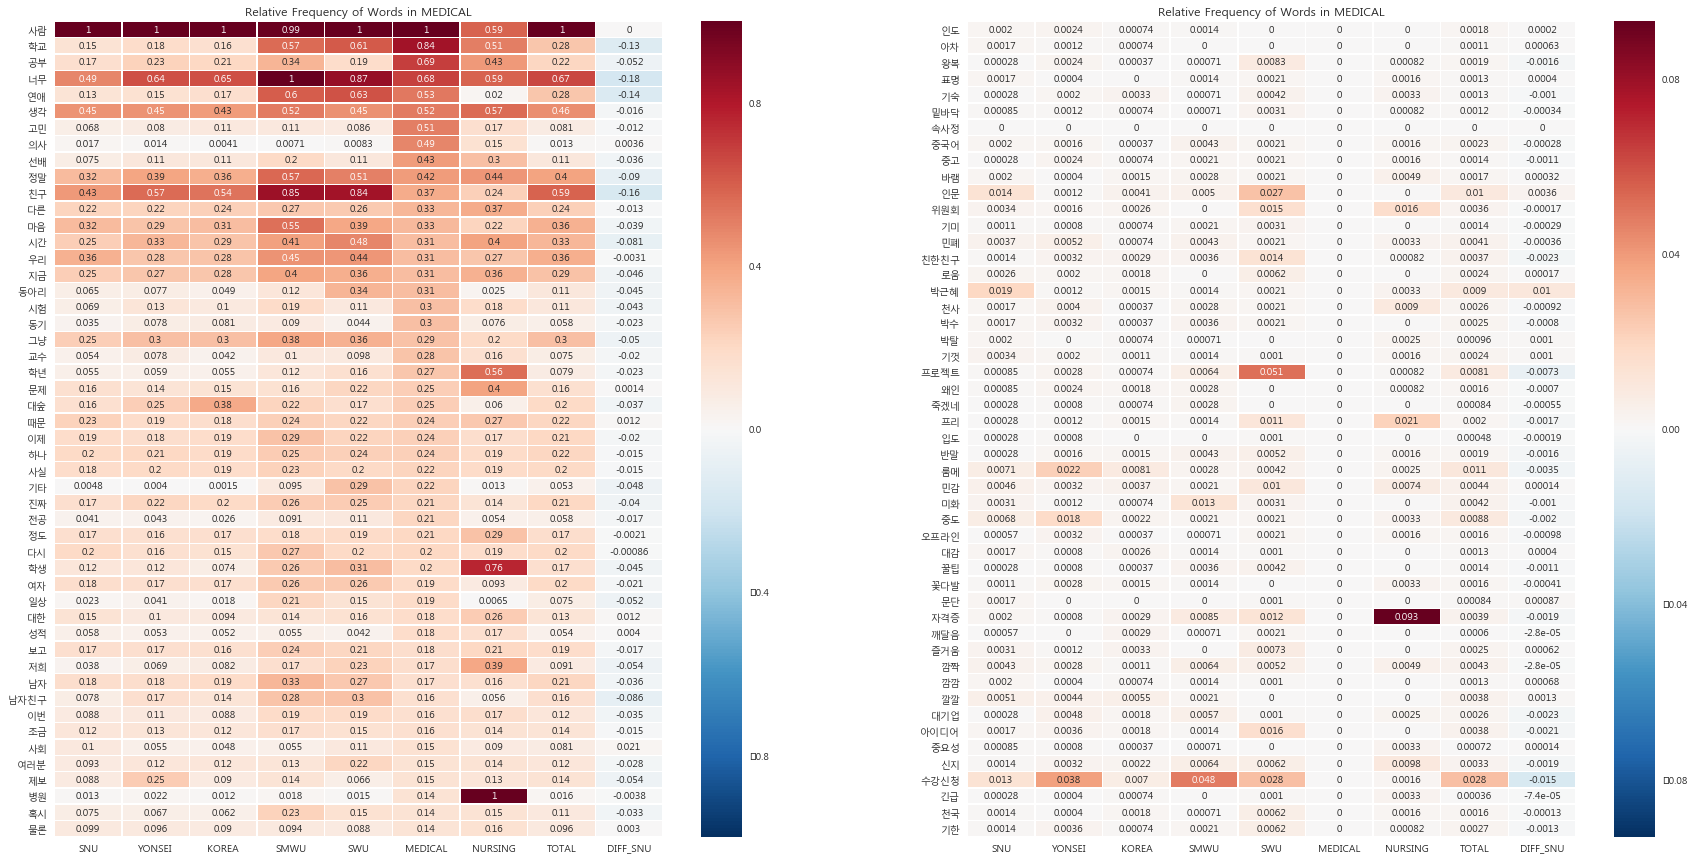

In [50]:
plt.figure(figsize=(30,15))

plt.subplot(121)
plt.title('Relative Frequency of Words in MEDICAL')
sns.heatmap(test.sort_values('MEDICAL',axis=0,ascending=False)[:50],annot=True,linewidths=0.5)

plt.subplot(122)
plt.title('Relative Frequency of Words in MEDICAL')
sns.heatmap(test.sort_values('MEDICAL',axis=0,ascending=True)[:50],annot=True,linewidths=0.5)

### Words Frequency

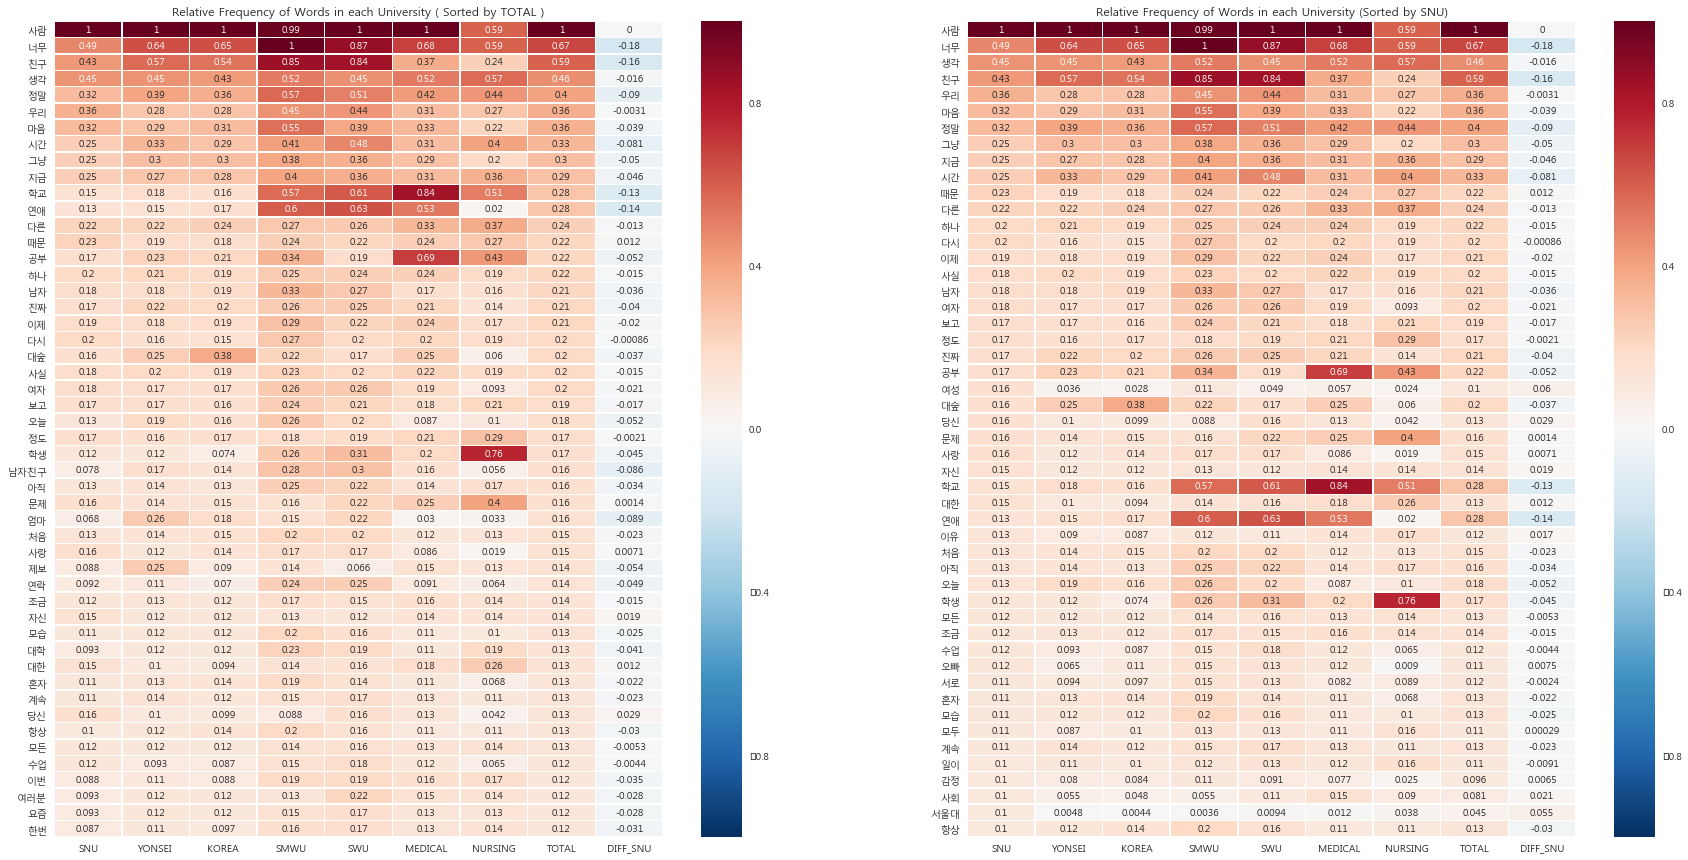

In [48]:
plt.figure(figsize=(30,15))

plt.subplot(121)
plt.title('Relative Frequency of Words in each University ( Sorted by TOTAL )')
sns.heatmap(test.sort_values('TOTAL',axis=0,ascending=False)[:50],annot=True,linewidths=0.5)

plt.subplot(122)
plt.title('Relative Frequency of Words in each University (Sorted by SNU)')
sns.heatmap(test.sort_values('SNU',axis=0,ascending=False)[:50],annot=True,linewidths=0.5)

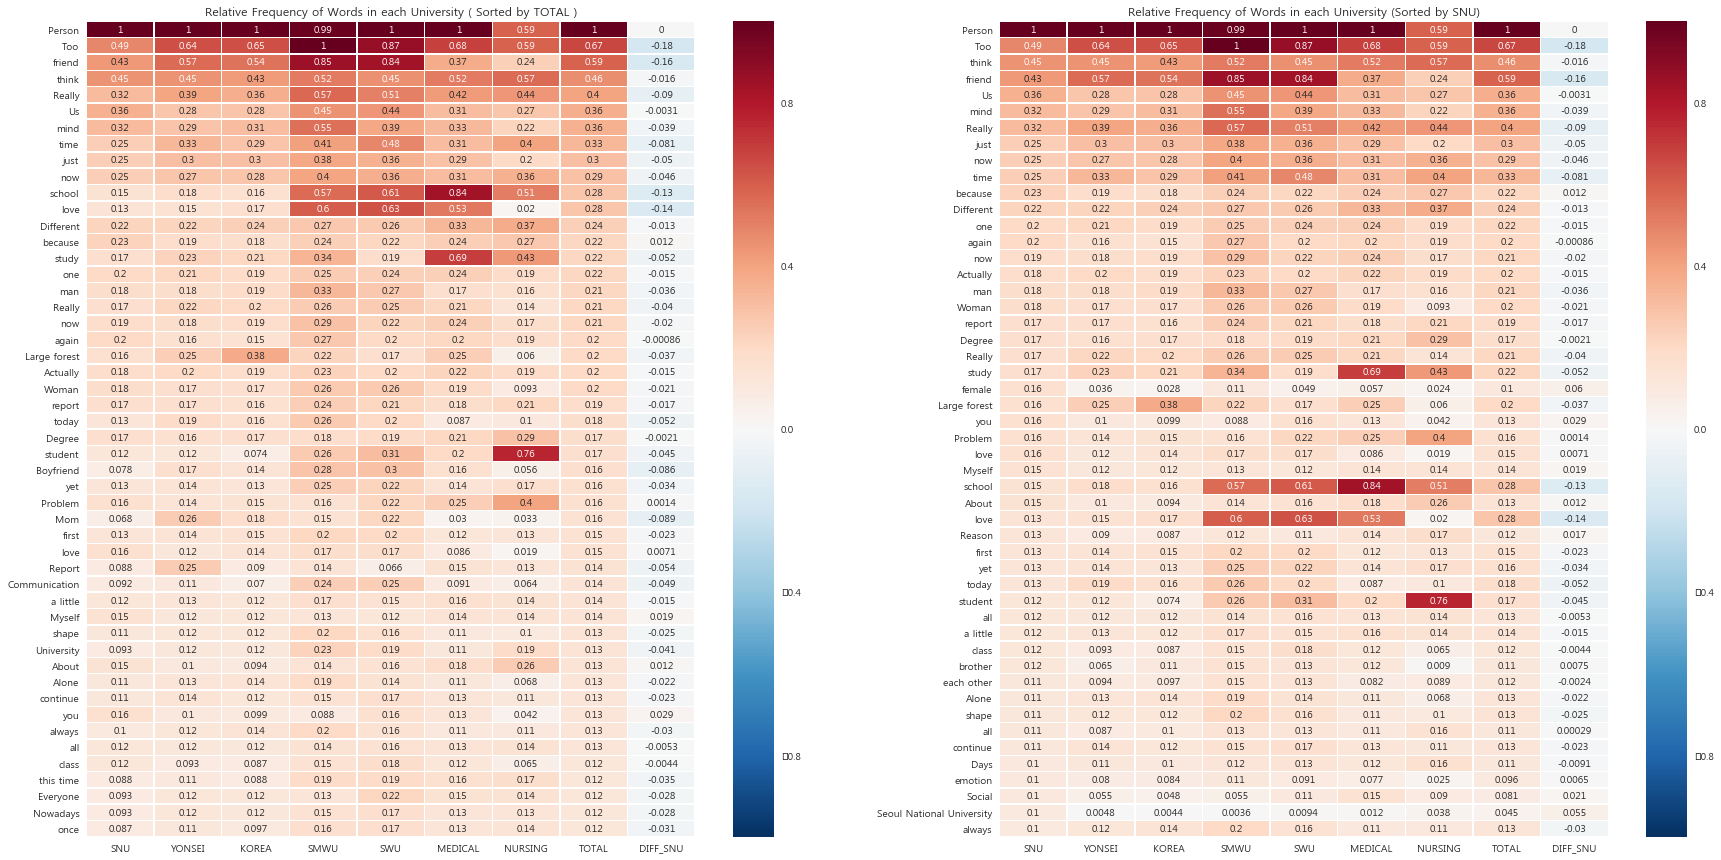

In [47]:
plt.figure(figsize=(30,15))

plt.subplot(121)
plt.title('Relative Frequency of Words in each University ( Sorted by TOTAL )')
sns.heatmap(test_Relative_FR_TOTAL,annot=True,linewidths=0.5)

plt.subplot(122)
plt.title('Relative Frequency of Words in each University (Sorted by SNU)')
sns.heatmap(test_Relative_FR_SNU,annot=True,linewidths=0.5)

### Frequently used in SNU

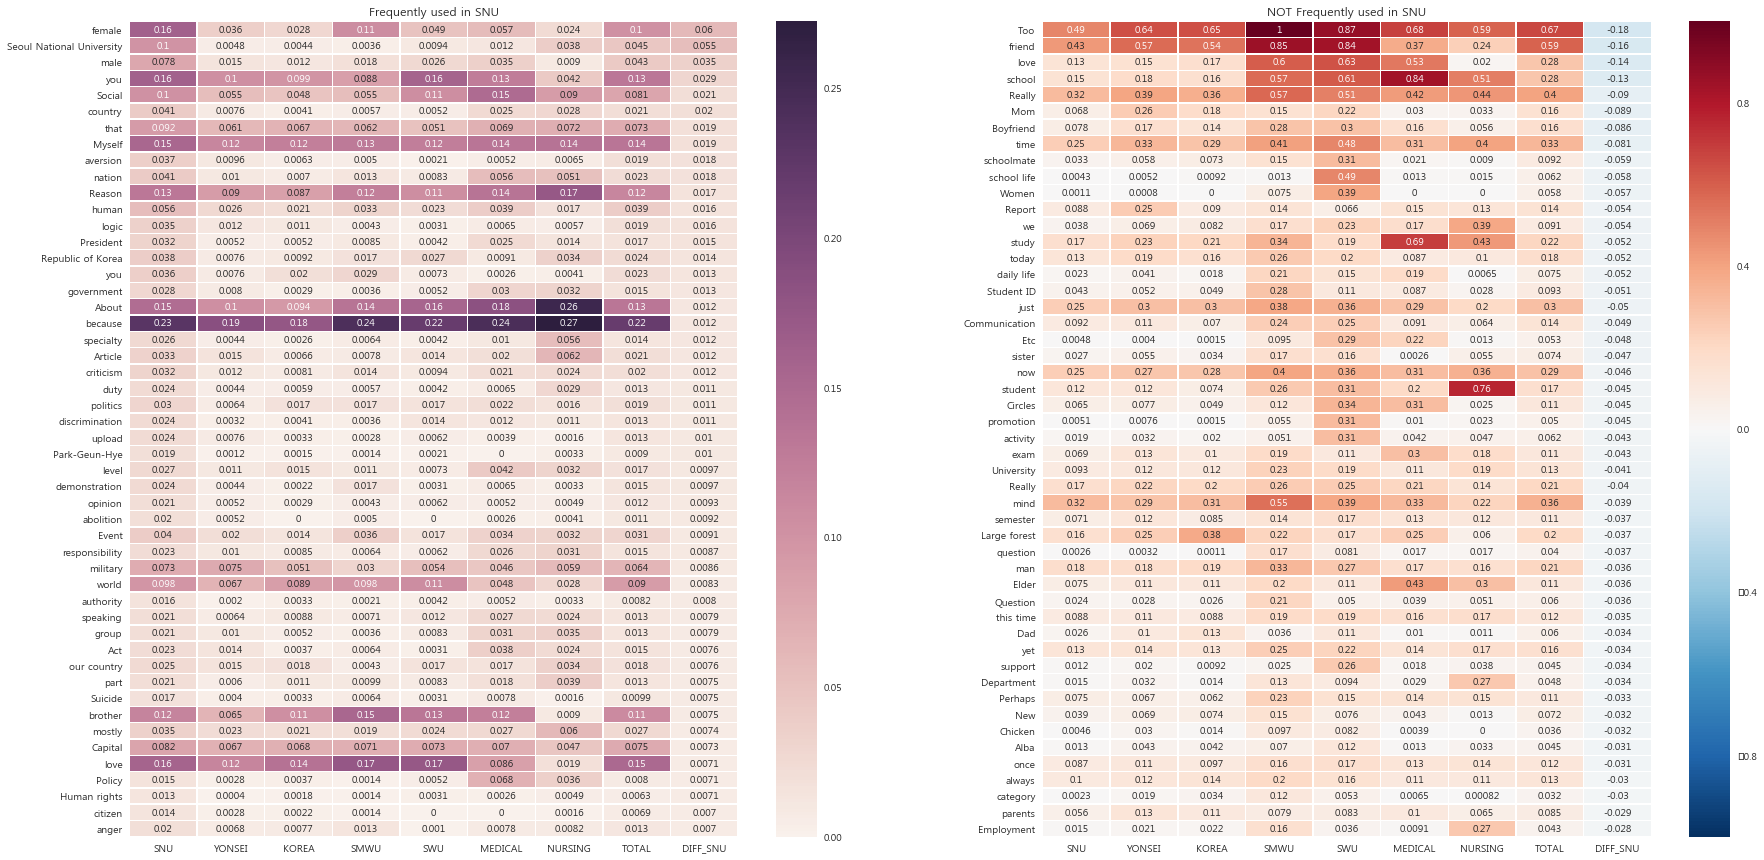

In [45]:
plt.figure(figsize=(30,15))

plt.subplot(121)
plt.title('Frequently used in SNU')
sns.heatmap(eng_test_decend.sort_values('DIFF_SNU',axis=0,ascending=False),annot=True,linewidths=0.5)

plt.subplot(122)
plt.title('NOT Frequently used in SNU')
sns.heatmap(eng_test_ascend.sort_values('DIFF_SNU',axis=0,ascending=True),annot=True,linewidths=0.5)

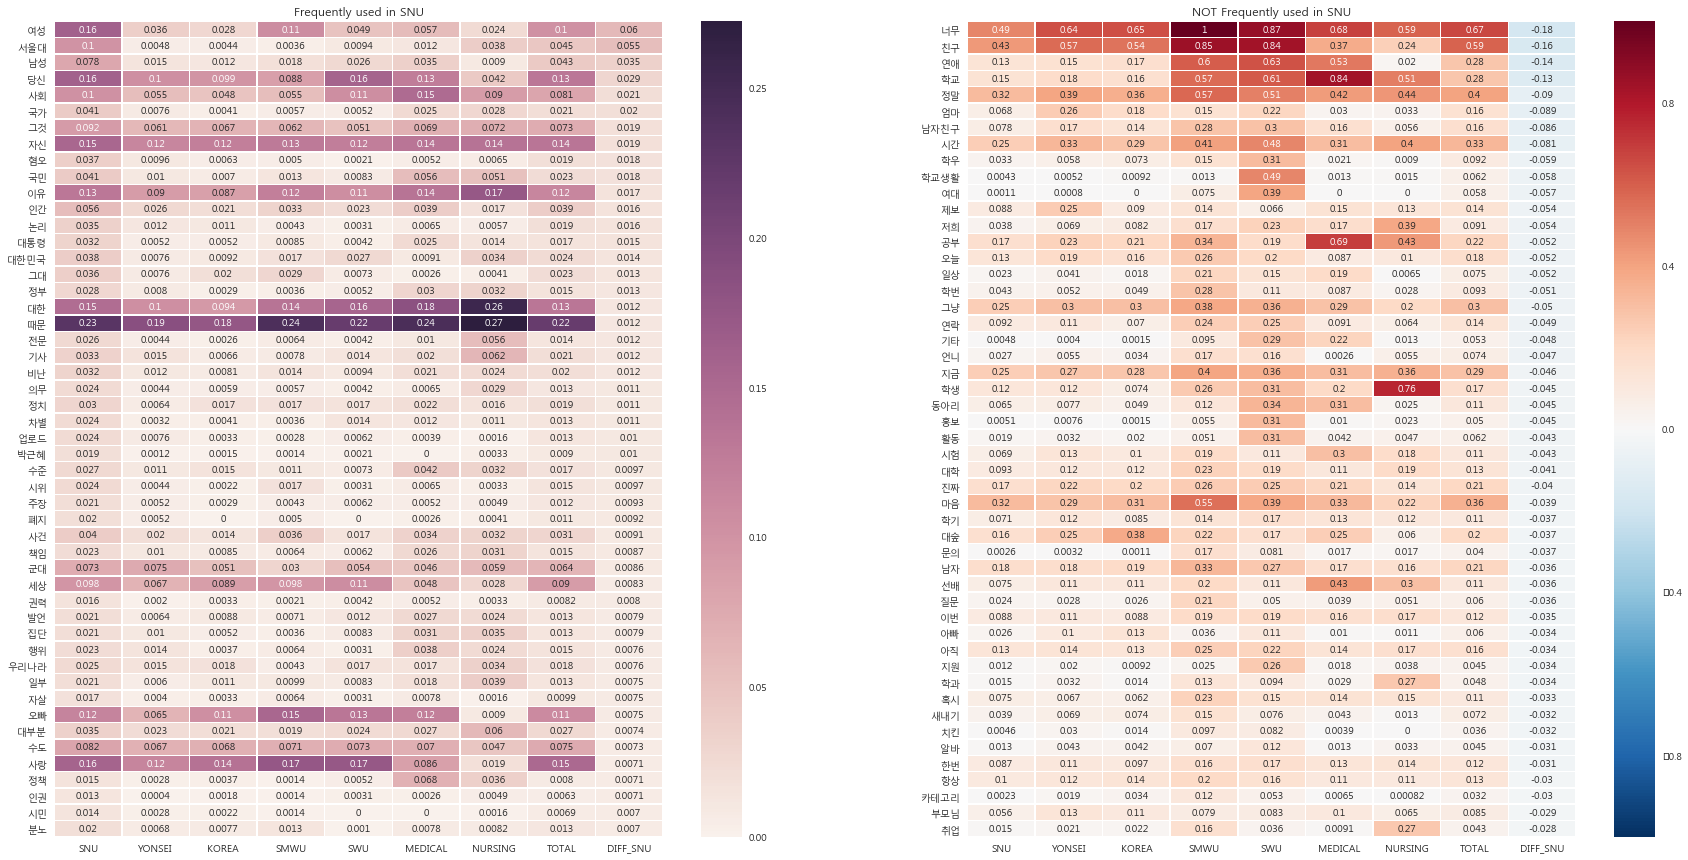

In [16]:
plt.figure(figsize=(30,15))

plt.subplot(121)
plt.title('Frequently used in SNU')
sns.heatmap(test.sort_values('DIFF_SNU',axis=0,ascending=False)[:50],annot=True,linewidths=0.5)

plt.subplot(122)
plt.title('NOT Frequently used in SNU')
sns.heatmap(test.sort_values('DIFF_SNU',axis=0,ascending=True)[:50],annot=True,linewidths=0.5)

# Check Point

## Tokenize the word and apply Decision Tree Method

In [1]:
from collections import Counter

import numpy as np
import pandas as pd
import scipy as sp
import pickle

with open('Tokened_Data.pickle','rb') as f:
    test = pickle.load(f)

In [2]:
test.head()

,num_likes,status_message,School,Tokenize
0,0.0,#32611번째포효\n\n대숲! 학교 공짜로 다니는 방법 있나요?\n저는 새내기 시...,KU,"[번, 포효, 대숲, 학교, 공짜, 방법, 저, 새내기, 시절, 별, 고민, 학년,..."
1,63.0,#32610번째포효\n\n대숲 잘 하는 게 없는 것 같아요.\n최근에 제대로 해내지...,KU,"[번, 포효, 대숲, 게, 것, 최근, 제대로, 못, 일이, 그, 일, 이후, 생각..."
2,212.0,#32609번째포효\n\n여기 국카스텐 팬 없나요!!!!!!!!!!!!!!!!!!!...,KU,"[번, 포효, 여기, 국카스텐, 팬, 너무, 오래, 드디어, 신곡]"
3,25.0,#32608번째포효\n\n대숲 하루하루 사는게 외나무다리 건너듯 아슬아슬해요\n좋은...,KU,"[번, 포효, 대숲, 하루하루, 외나무다리, 아슬아슬, 요, 일이, 것, 그, 뒤,..."
4,255.0,"#32607번째포효\n\n중, 고등학생 때는 도대체 왜 필름 끊기나 궁금했는데, 이...",KU,"[번, 포효, 고등학생, 때, 도대체, 왜, 필름, 젠, 밥, 먹듯, 필름]"


## Set the threshold value alpha, using Frequency Dictionary

In [11]:
def get_freq_dic(data):
    freq = Counter()
    for tokens in data:
        for token in tokens:
            freq[token] = freq[token] + 1

    total = 0
    for key in freq.keys():
        total = total + freq[key]
    
    for key in freq.keys():
        freq[key] = freq[key] / total
        
    return freq

## Get The Frequency Dictionary

In [12]:
freq = get_freq_dic(test.Tokenize)

In [ ]:
freq.most_common()[200:400]

## Set Stop words

In [38]:
stop_words=[]

## Use Sklearn's derived class using overriding technique

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [55]:
class Kor_noun_Vectorizer(CountVectorizer):
    
    def build_analyzer(self):        
        
        from konlpy.tag import Twitter
        from hanja import hangul
        
        def return_hangul(string):
            temp =""
            for x in string:
                if((hangul.is_hangul(x)) | (x==" ") ):
                    temp = temp + x
            return temp
        
        temp = Twitter()
        
        
        return lambda doc :  [ x for x in temp.nouns(return_hangul(doc)) if (len(x)>=2 and not x in stop_words and freq[x]>=0.00001)]

In [ ]:
x= Kor_noun_Vectorizer()
X_train = x.fit_transform(test.status_message)
x.get_feature_names()[:10]

In [57]:
Y_train = test.School.apply(lambda x : 1 if x == "SNU"  else 0)

## Apply Decision Tree Method to Determine Most Influential Factor

### Using K-fold Cross Validation 

In [60]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

### Well... It's different with my Think

"서울대"스러운 단어 보다 "서울대에서 쓰지 않을 법한" 단어 ( ex 고려대학교 / 숙명여대 / 성균관대 ... 등 ) 이 훨씬 중요한 비중을 차지함

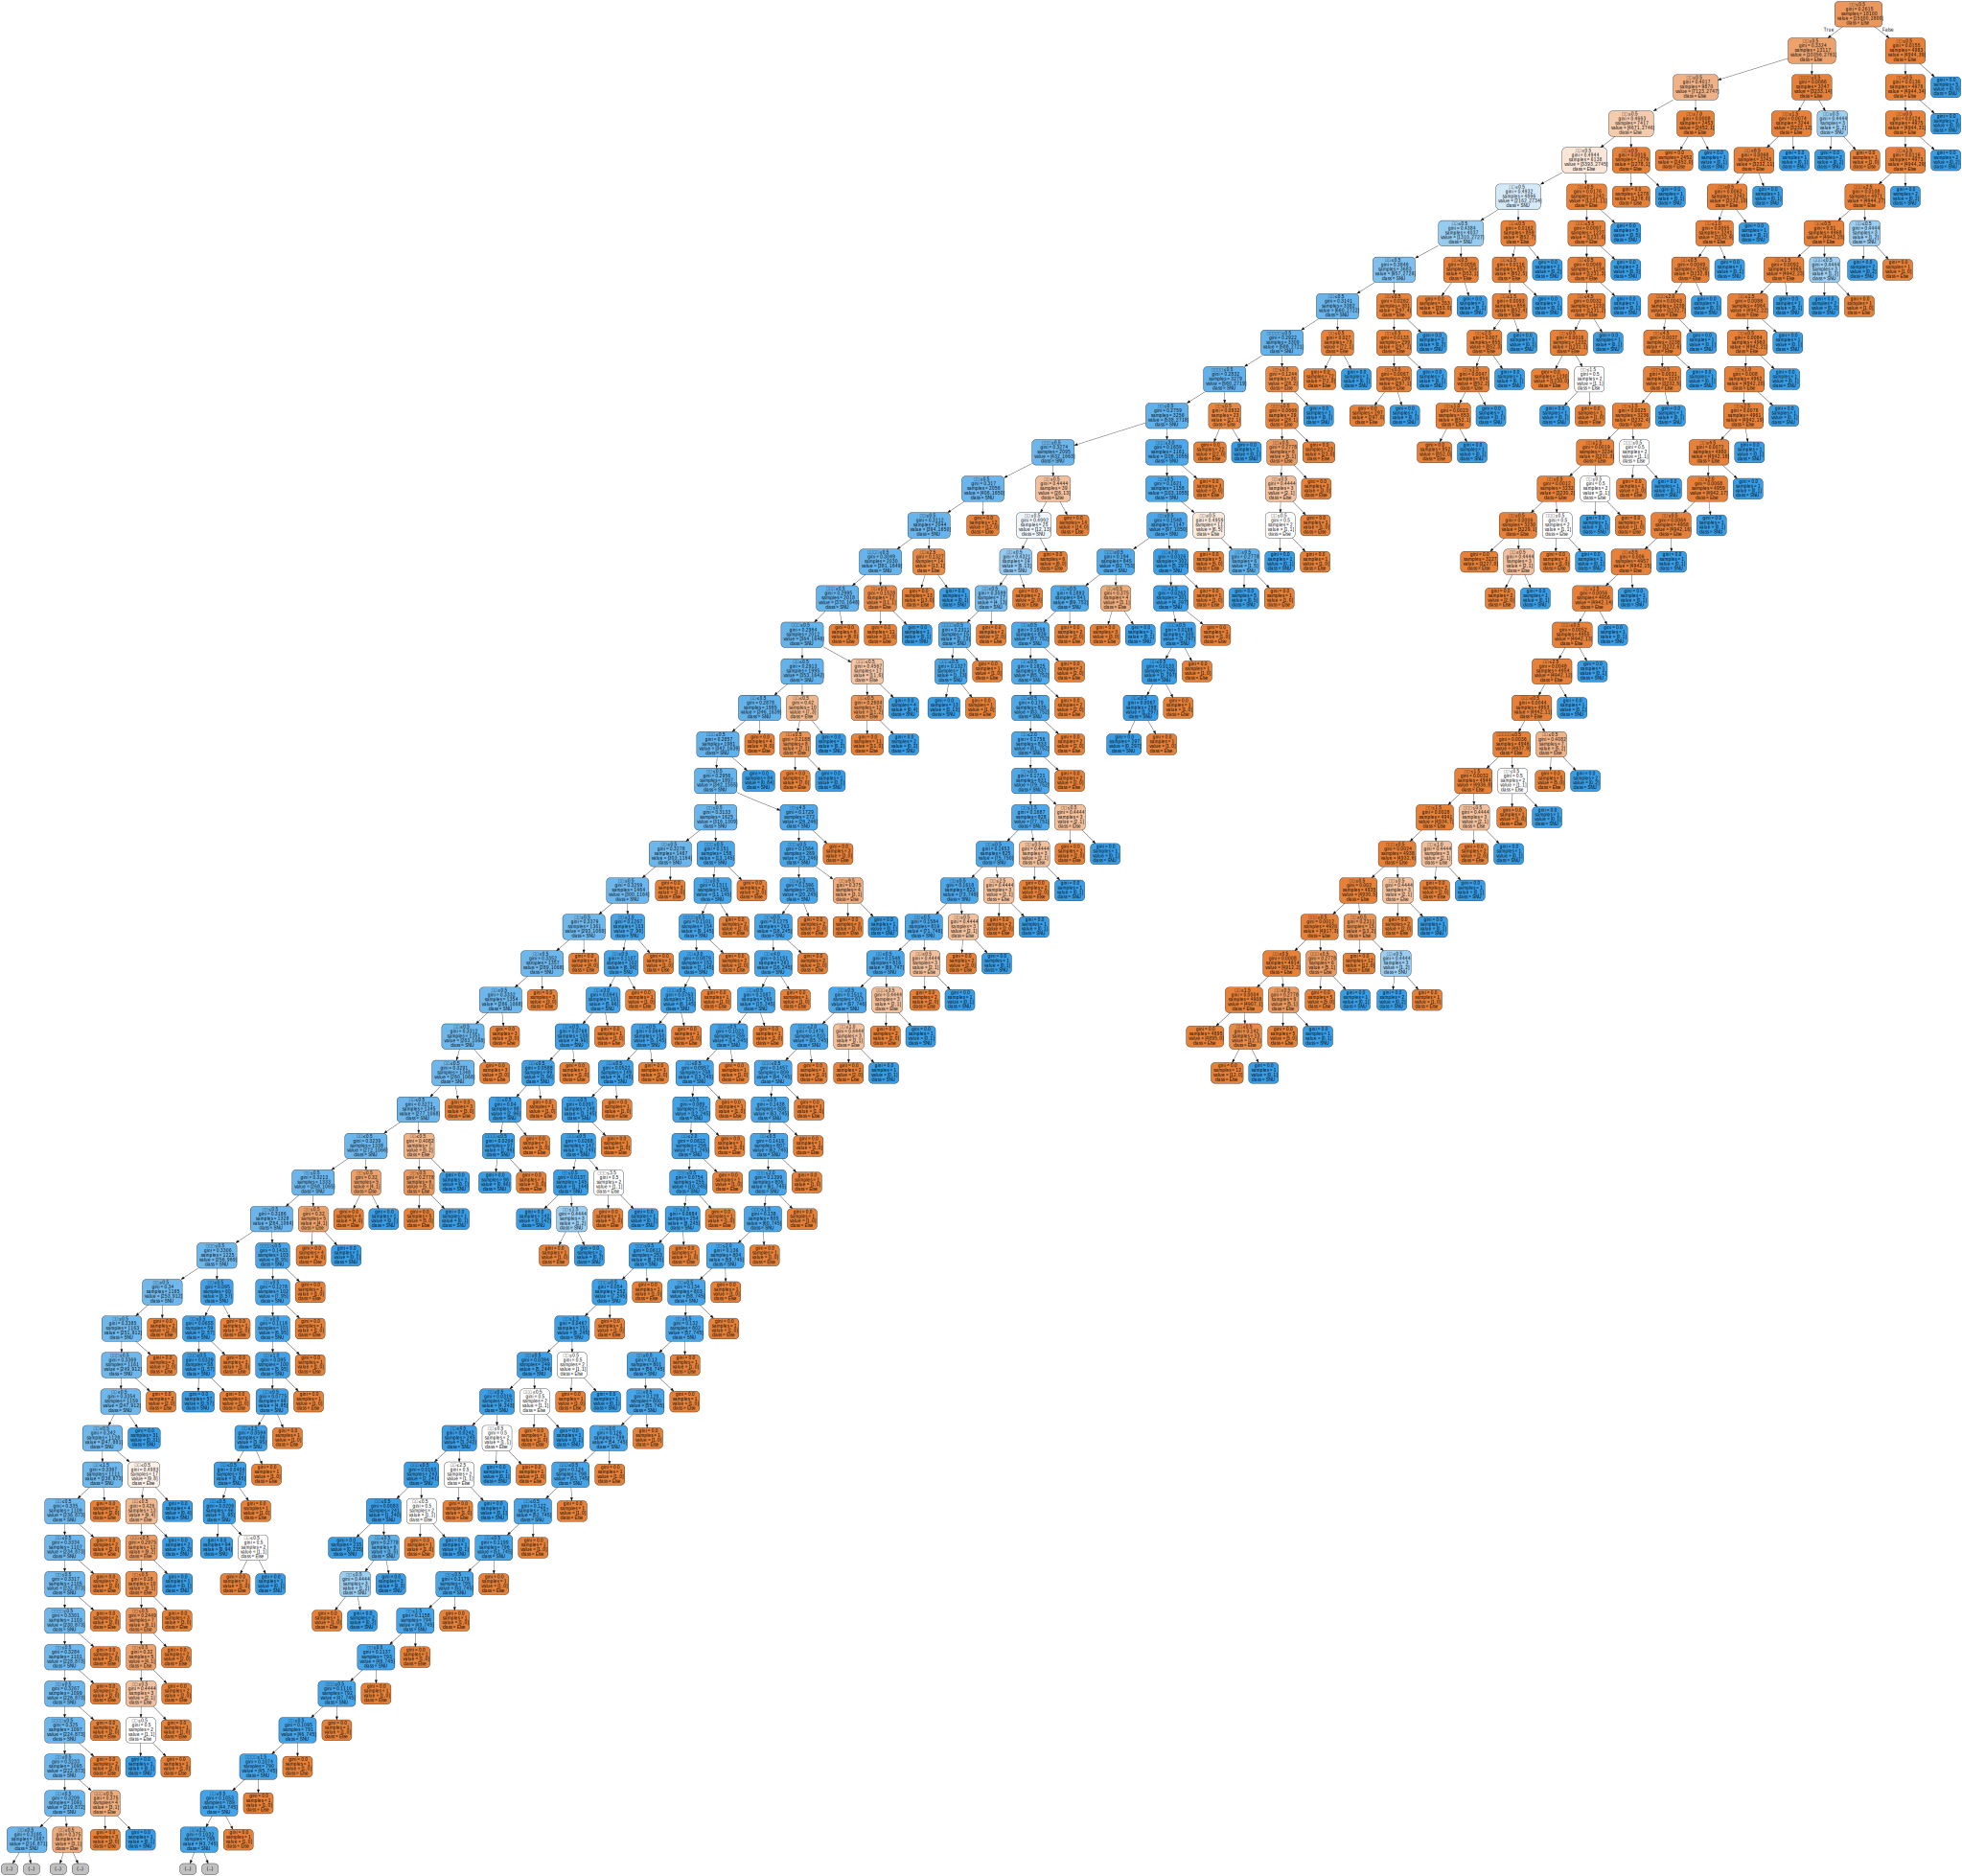

In [65]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=x.get_feature_names(),
                         class_names=['Else','SNU'],  
                         filled=True, rounded=True,  
                         special_characters=True,max_depth=50)  
graph = graphviz.Source(dot_data)  
graph 